# Exploratory Data Analysis of "La Redoute" reviews data from TrustedShops

### Required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scikit_posthocs as sp
import statsmodels.api as sm
from scipy.stats import levene
from statsmodels.formula.api import ols
from scipy.stats import kruskal




In [5]:
file = "redoute_v31.csv"
df = pd.read_csv(file, sep =",", index_col = 0)
display(df.head(5))

,rating,comment,createdAt,SupplierReply,SupplierReplyDate
id,,,,,
rev-0134d691-cf06-4caa-8d42-528cea655fa2,4,"Une livraison assez rapide, les tailles sont b...",2023-10-06 18:09:56,"Bonjour, merci pour vos encouragements. Vos re...",2023-10-13 09:56:10
rev-97bff9c6-1d08-4caf-8c8a-5fc8f168d817,4,Juste vous dire que la qualité est inférieure ...,2023-10-05 14:37:16,"Bonjour, merci d'avoir pris le temps de nous p...",2023-10-12 10:01:19
rev-b9f9a2c6-9c55-48d4-980a-3224367b0fc8,4,Vendeur et vendeuse au top dans le magasin Gal...,2023-10-04 14:38:55,"Bonjour, merci de nous partager votre expérien...",2023-10-11 12:42:01
rev-31ced4d5-10da-49dc-9111-8eb9ee5f2fe4,4,M'ayant été signalé que mon colis ne pouvait ê...,2023-09-23 08:12:33,"Bonjour, merci d'avoir pris le temps de partag...",2023-10-09 13:43:27
rev-d1d74f83-bd9a-468f-beeb-b2c64ebc65b2,4,J'apprécie la redoute pour sa fiabilité et son...,2023-10-09 20:25:34,"Bonjour, merci d'avoir pris le temps de nous p...",2023-10-16 12:03:29


### EDA (Exploration de données)

In [12]:
# Statistiques descriptives de la colonne 'rating'
print(df['rating'].describe())

count    5806.000000
mean        2.915949
std         1.144886
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64


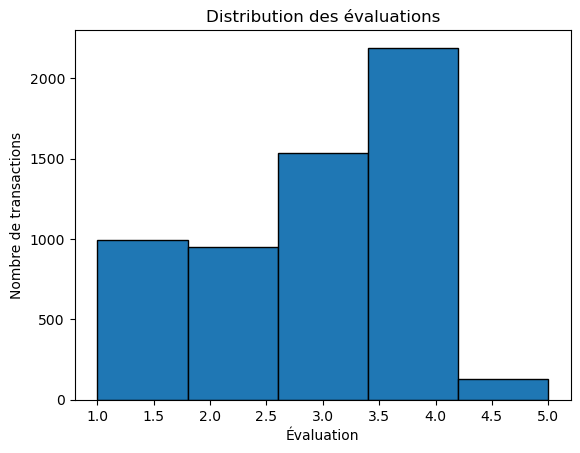

In [13]:
# Distribution des évaluations (ratings) 

plt.hist(df['rating'], bins=5, edgecolor="k")
plt.title('Distribution des évaluations')
plt.xlabel('Évaluation')
plt.ylabel('Nombre de transactions')
plt.show()


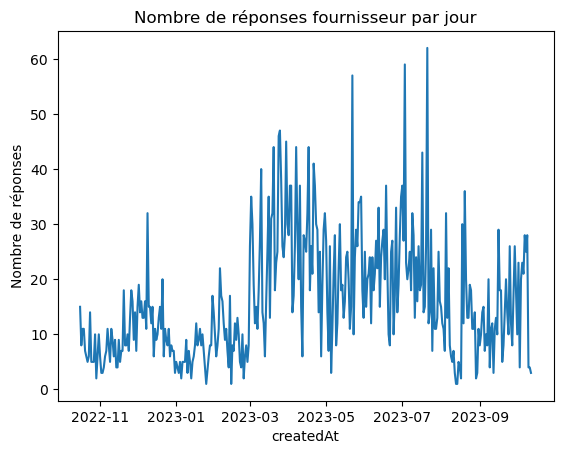

In [14]:
# Nombre total de réponses fournisseur par jour

df.groupby(df['createdAt'].dt.date).size().plot(kind='line', title="Nombre de réponses fournisseur par jour")
plt.ylabel('Nombre de réponses')
plt.show()


In [15]:
# Délai moyen entre la création et la réponse du fournisseur 

df['Delay'] = (df['SupplierReplyDate'] - df['createdAt']).dt.days
average_delay = df['Delay'].mean()
print(f"Délai moyen de réponse : {average_delay:.2f} jours")


Délai moyen de réponse : 6.62 jours


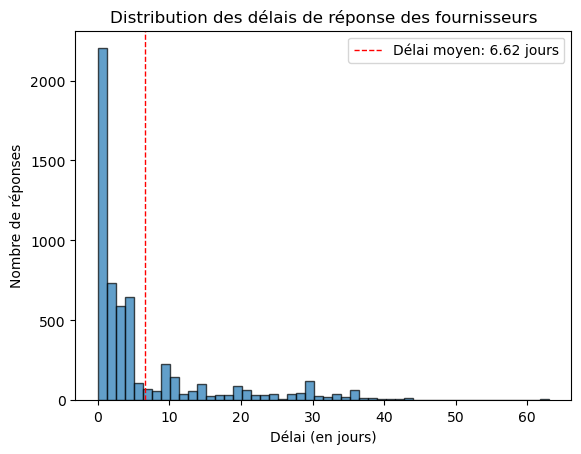

In [16]:
# Histogramme pour visualiser la distribution du délai entre la création 
# et la réponse du fournisseur 

plt.hist(df['Delay'], bins=50, edgecolor="k", alpha=0.7)
plt.axvline(average_delay, color='red', linestyle='dashed', linewidth=1, label=f'Délai moyen: {average_delay:.2f} jours')
plt.title('Distribution des délais de réponse des fournisseurs')
plt.xlabel('Délai (en jours)')
plt.ylabel('Nombre de réponses')
plt.legend()
plt.show()



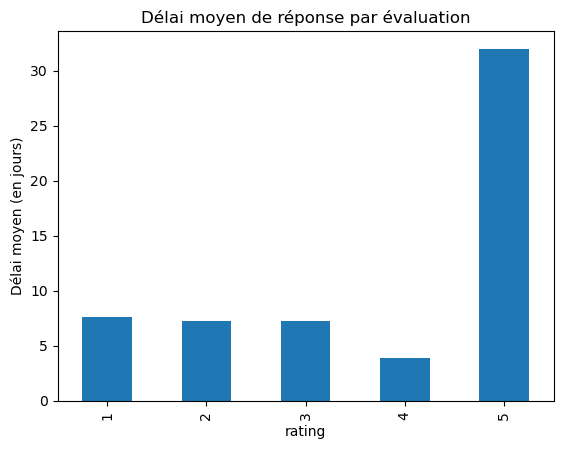

In [17]:
# Délai de réponse en fonction de l'évaluation

delay_by_rating = df.groupby('rating')['Delay'].mean()
delay_by_rating.plot(kind='bar', title="Délai moyen de réponse par évaluation")
plt.ylabel('Délai moyen (en jours)')
plt.show()


In [18]:
# Délai le plus court, le plus long et le délai médian entre la création et la réponse du fournisseur

min_delay = df['Delay'].min()
max_delay = df['Delay'].max()
median_delay = df['Delay'].median()

print(f"Délai le plus court : {min_delay} jours")
print(f"Délai le plus long : {max_delay} jours")
print(f"Délai médian : {median_delay} jours")



Délai le plus court : 0 jours
Délai le plus long : 63 jours
Délai médian : 2.0 jours


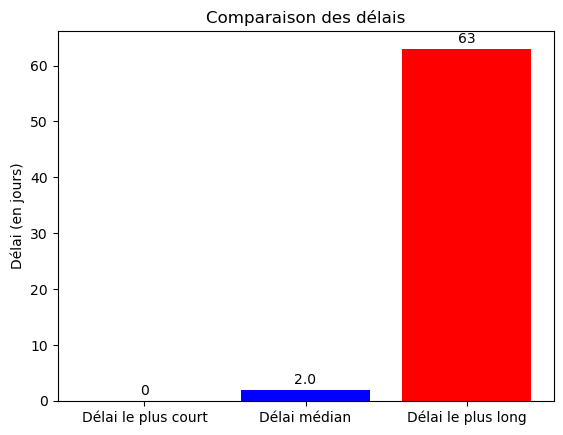

In [19]:
# Barre verticale pour visualiser le délai le plus court, le plus long et 
#le délai médian 

delays = [min_delay, median_delay, max_delay]
names = ["Délai le plus court", "Délai médian", "Délai le plus long"]

plt.bar(names, delays, color=['green', 'blue', 'red'])
plt.title("Comparaison des délais")
plt.ylabel("Délai (en jours)")
for i, v in enumerate(delays):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.show()



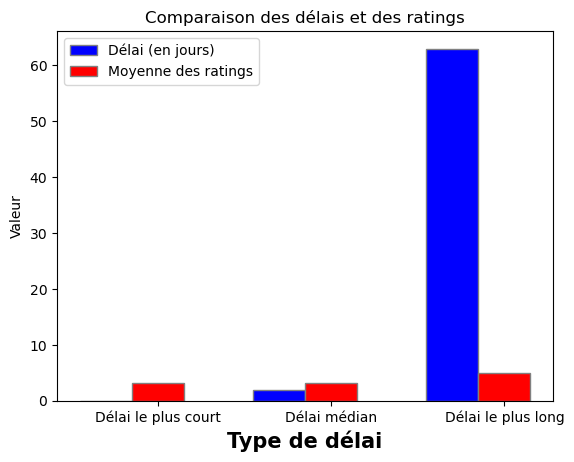

In [20]:
# Calculer les moyennes des notations pour les transactions ayant le délai le plus court, 
# le délai médian et le délai le plus long :
rating_min_delay = df[df['Delay'] == min_delay]['rating'].mean()
rating_median_delay = df[df['Delay'] == median_delay]['rating'].mean()
rating_max_delay = df[df['Delay'] == max_delay]['rating'].mean()

# Position des groupes sur l'axe X
barWidth = 0.3
r1 = np.arange(len(delays))
r2 = [x + barWidth for x in r1]

plt.bar(r1, delays, color='blue', width=barWidth, edgecolor='grey', label='Délai (en jours)')
plt.bar(r2, [rating_min_delay, rating_median_delay, rating_max_delay], color='red', width=barWidth, edgecolor='grey', label='Moyenne des ratings')

# Ajout des titres et labels
plt.title('Comparaison des délais et des ratings')
plt.xlabel('Type de délai', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(delays))], ['Délai le plus court', 'Délai médian', 'Délai le plus long'])
plt.ylabel('Valeur')

# Créer une légende
plt.legend()
plt.show()


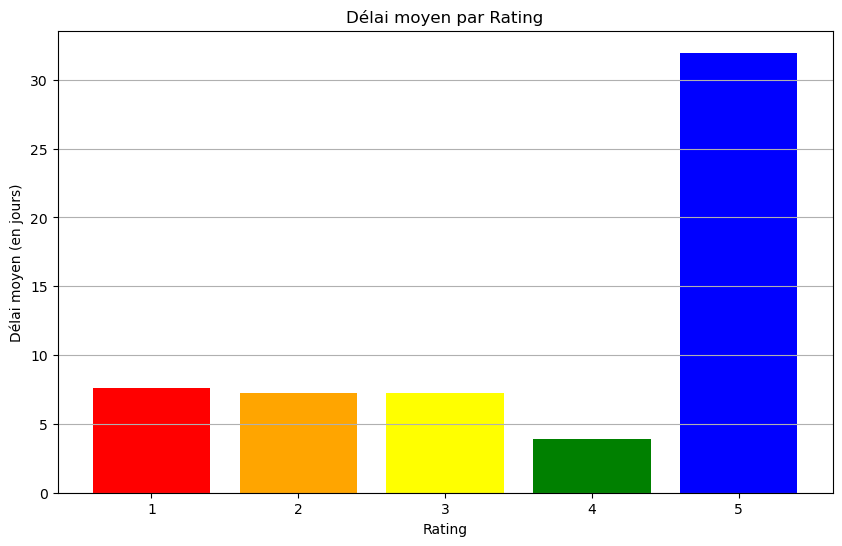

In [21]:
# Calculer le délai moyen pour chaque rating
grouped = df.groupby('rating')['Delay'].mean().reset_index()

# Visualiser les résultats avec un graphique à barres

plt.figure(figsize=(10, 6))
plt.bar(grouped['rating'], grouped['Delay'], color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Délai moyen par Rating')
plt.xlabel('Rating')
plt.ylabel('Délai moyen (en jours)')
plt.xticks(grouped['rating'])
plt.grid(axis='y')
plt.show()


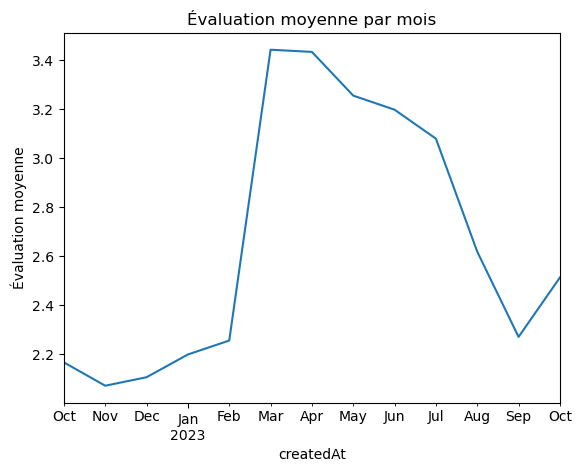

In [22]:
# Répartition mensuelle des évaluations 

df.groupby(df['createdAt'].dt.to_period("M"))['rating'].mean().plot(kind='line', title="Évaluation moyenne par mois")
plt.ylabel('Évaluation moyenne')
plt.show()






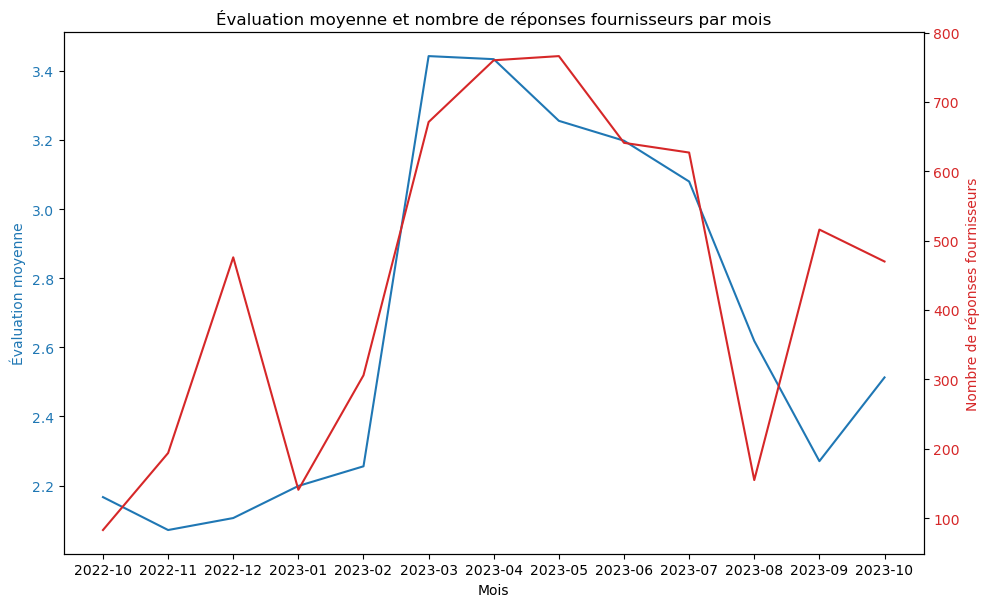

In [23]:
# Calcul de l'évaluation moyenne par mois
ratings_per_month = df.groupby(df['createdAt'].dt.to_period("M"))['rating'].mean()

# Calcul du nombre de réponses fournisseurs par mois:
supplier_replies_per_month = df.groupby(df['SupplierReplyDate'].dt.to_period("M")).size()

# Visualiser les deux series sur le meme graphique:

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Mois')
ax1.set_ylabel('Évaluation moyenne', color=color)
ax1.plot(ratings_per_month.index.astype(str), ratings_per_month.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Nombre de réponses fournisseurs', color=color)  
ax2.plot(supplier_replies_per_month.index.astype(str), supplier_replies_per_month.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Évaluation moyenne et nombre de réponses fournisseurs par mois')
plt.show()



In [24]:
# Etude de la variation de la note en fonction du type de réponse prédéfinie(SupplierReply), 
# nous souhaitons effectuer une analyse statistique et de visualisation pour voir 
# s'il existe une relation ou une corrélation entre les deux.

In [25]:
# Agregation des 'SupplierReply'

avg_ratings = df.groupby('SupplierReply')['rating'].mean().sort_values(ascending=False)

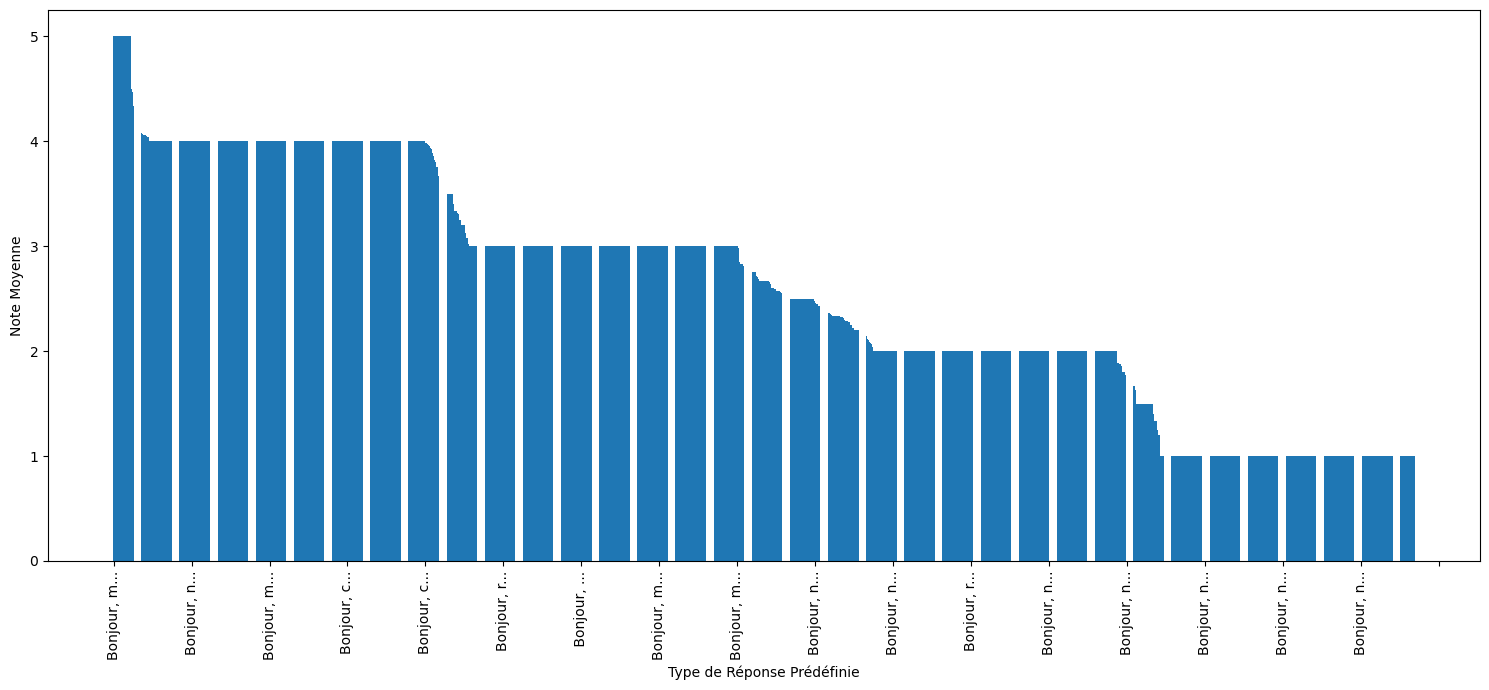

In [26]:
# Visualisation
# Fonction pour tronquer les labels
def truncate_labels(labels, max_length):
    """Tronque les labels à une longueur maximale spécifiée."""
    return [label if len(label) <= max_length else label[:max_length] + "..." for label in labels]

# Définition de la longueur maximale
max_length = 10

# Création de la figure et le graphique à barres
plt.figure(figsize=(15, 7))
plt.bar(range(len(avg_ratings)), avg_ratings.values)

# Affecter les labels tronqués aux ticks de l'axe des X
plt.xticks(range(len(avg_ratings)), truncate_labels(avg_ratings.index, max_length), rotation=90)

# Définir les labels des axes et titre
plt.ylabel('Note Moyenne')
plt.xlabel('Type de Réponse Prédéfinie')

# Get current axes

ax = plt.gca()  
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=20))  # Limiter le nombre de labels sur l'axe X

# Afficher le graphique
plt.tight_layout()  # Ajuster la disposition
plt.show()


# Tests statistiques 

### Preambule verifications des suppositions
### 1/ homogeneite des variances
### 2/ normalite des residus

In [29]:
# 1/ homogeneite des variances / Test de Levene

# Liste pour stocker les groupes de notes
groups = [df['rating'][df['SupplierReply'] == reply] for reply in df['SupplierReply'].unique()]
# Test de Levene
statistic, p_value = levene(*groups)
print(f'Statistique: {statistic}')
print(f'P-valeur: {p_value}')


Statistique: 1.72604153619374
P-valeur: 1.093552110575327e-38


In [30]:
# Une p-valeur aussi petite indique que l'on peut 
# rejeter l'hypothèse nulle d'égalité des variances 
# entre les différents groupes (chaque groupe correspond 
# à une réponse de SupplierReply). Donc les données 
# suggèrent qu'il existe des différences significatives dans les 
# variances des notes pour chaque type de réponse prédéfinie du fournisseur.

# Cela implique que pour les analyses qui supposent 
# l'homogénéité des variances (comme l'ANOVA), cette condition 
# n'est pas remplie dans votre jeu de données.

# On peut avoir besoin de corriger cela ou d'utiliser des 
# méthodes statistiques robustes qui n'ont pas besoin de cette hypothèse.

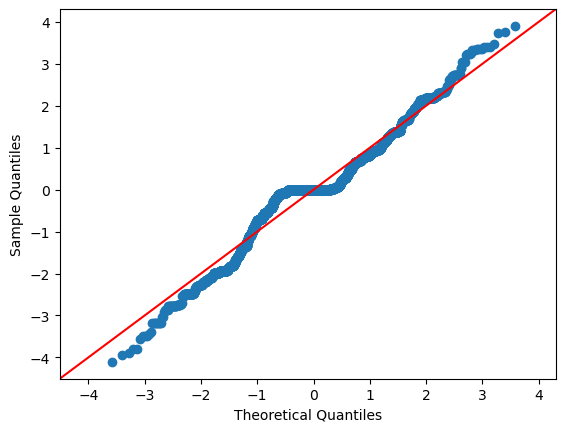

In [31]:
# 2/ Normalite des residus
# Graphiquement - à l'aide d'un QQ-plot

model = ols('rating ~ C(SupplierReply)',data=df).fit()
residus = model.resid
sm.qqplot(residus, fit=True, line="45")
plt.show()


In [32]:
# ANALYSE TEST DE LEVENNE

# l'hypothèse nulle est que l'échantillon provient 
# d'une population normalement distribuée
# Ici la p-valeur presque nulle balaye l'hypothese H0

# ANALYSE DU QQPLOT

# Dans notre graphique, la plupart des points semblent 
#suivre la ligne rouge, mais avec quelques écarts aux extrémités, 
#indiquant des queues plus lourdes que celles de la distribution normale. 
#Cela signifie que les résidus sont en grande partie normalement distribués, 
#mais il existe des preuves de kurtosis (c'est-à-dire des pics plus prononcés 
#ou des queues plus lourdes que celles d'une distribution normale)



In [33]:
# Utilisation d'un test moins sensible à la normalite et à l'egalite des variances
# 2 options test de KRUSKALL-WALLIS (test non parametrique) et ANOVA DE WELCH



In [34]:
#  'df'  contient une colonne 'rating' pour les notes et 'SupplierReply' pour les types de réponses prédéfinies.

# Création d'une liste de séries contenant les notes pour chaque groupe unique de 'SupplierReply'
groups = [group['rating'].values for name, group in df.groupby('SupplierReply')]

# Appliquer le test de Kruskal-Wallis à la liste des groupes
stat, p_value = kruskal(*groups)

print(f'Statistique de test: {stat}')
print(f'P-value: {p_value}')

# Interprétation de la p-value
alpha = 0.05  # Seuil de signification habituel
if p_value < alpha:
    print(f"On rejette l'hypothèse nulle : il existe des différences significatives entre les groupes.")
else:
    print(f"On ne peut pas rejeter l'hypothèse nulle : il n'y a pas de preuve de différences significatives entre les groupes.")


Statistique de test: 3731.4976588010613
P-value: 3.268815160296018e-225
On rejette l'hypothèse nulle : il existe des différences significatives entre les groupes.


In [35]:
# Avec une valeur de p aussi petite, on a une très forte 
# évidence statistique que la distribution des notes n'est pas la 
# même pour tous les types de réponses prédéfinies (SupplierReply).
# Dans la literrature on lit que le test de Kruskal-Wallis ne nous 
# indique pas quels groupes sont différents ou la nature de ces différences 
# il est conseille d'envisager de faire des analyses post hoc 
# avec des tests par paires pour comparer les distributions des notes 
# entre chaque paire de groupes. Une méthode courante est le test de Dunn 
# pour les comparaisons multiples après un test de Kruskal-Wallis

### Test de Dunn

In [36]:

# Nous créons d'abord un array des notes et un array correspondant des catégories de SupplierReply
notes = df['rating'].values
categories = df['SupplierReply'].values

# Le test de Dunn doit être effectué après un test de Kruskal-Wallis significatif
# Nous utilisons les p-valeurs ajustées par la méthode de Bonferroni pour tenir compte des comparaisons multiples
p_values = sp.posthoc_dunn([notes[categories == k] for k in np.unique(categories)], p_adjust='bonferroni')

# Affichage des résultats sous forme de tableau, où chaque cellule représente la p-valeur ajustée de la comparaison entre les groupes
print(p_values)


      1     2     3     4     5     6     7     8     9     10    ...  1327  \
1      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
2      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
3      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
4      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
5      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1332   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1333   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1334   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1335   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1336   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   

      1328  1329  1330  1331  1332  1333  1334  133

In [37]:
print(df['SupplierReply'].value_counts())


SupplierReply
Bonjour, nous avons tenté de vous joindre sans succès. Afin de trouver une solution ensemble, je vous invite à vous rendre dans la rubrique Contact du site (qui se trouve dans notre footer ou via notre moteur de recherche) ou en copiant/collant dans votre navigateur l’adresse URL suivante: https://www.laredoute.fr/espace-contact-conseiller.aspx. Loubna de l’équipe Service Client.         306
Bonjour,  nous avons tenté de vous joindre sans succès. Afin de trouver une  solution ensemble, je vous invite à vous rendre dans la rubrique Contact  du site (qui se trouve dans notre footer ou via notre moteur de  recherche) ou en copiant/collant dans votre navigateur l’adresse URL  suivante : https://www.laredoute.fr/espace-contact-conseiller.aspx. Zineb de l’équipe Service Client.    192
Bonjour, merci d’avoir pris le temps de témoigner de votre expérience ! Vos remarques nous aident à nous améliorer . À très vite ! Wassim de l'équipe Service Client                                

In [38]:
categories = df['SupplierReply'].values
print(np.unique(categories))


["\nBonjour , merci d’avoir pris le temps de témoigner de votre expérience ! A très vite, Zineb de l'équipe Service Client."
 '\nBonjour,  nous avons tenté de vous joindre sans succès. Afin de trouver une  solution ensemble, je vous invite à vous rendre dans la rubrique Contact  du site (qui se trouve dans notre footer ou via notre moteur de  recherche) ou en copiant/collant dans votre navigateur l’adresse URL  suivante : https://www.laredoute.fr/espace-contact-conseiller.aspx. Zineb de l’équipe Service Client.'
 '\nBonjour,  nous avons tenté de vous joindre sans succès. Afin de trouver une  solution ensemble, je vous invite à vous rendre dans la rubrique Contact  du site (qui se trouve dans notre footer ou via notre moteur de  recherche) ou en copiant/collant dans votre navigateur l’adresse URL  suivante : https://www.laredoute.fr/espace-contact-conseiller.aspx. Zineb de l’équipe Service Client.\n\n'
 ...
 "\xa0\xa0Bonjour, j’ai bien noté que vous n’avez pas été entièrement satisfait 

In [39]:
for k in np.unique(categories):
    print(f"Categorie {k}:", df['rating'][categories == k].values)


Categorie 
Bonjour , merci d’avoir pris le temps de témoigner de votre expérience ! A très vite, Zineb de l'équipe Service Client.: [4 4]
Categorie 
Bonjour,  nous avons tenté de vous joindre sans succès. Afin de trouver une  solution ensemble, je vous invite à vous rendre dans la rubrique Contact  du site (qui se trouve dans notre footer ou via notre moteur de  recherche) ou en copiant/collant dans votre navigateur l’adresse URL  suivante : https://www.laredoute.fr/espace-contact-conseiller.aspx. Zineb de l’équipe Service Client.: [1 3 2 3 3 3 2]
Categorie 
Bonjour,  nous avons tenté de vous joindre sans succès. Afin de trouver une  solution ensemble, je vous invite à vous rendre dans la rubrique Contact  du site (qui se trouve dans notre footer ou via notre moteur de  recherche) ou en copiant/collant dans votre navigateur l’adresse URL  suivante : https://www.laredoute.fr/espace-contact-conseiller.aspx. Zineb de l’équipe Service Client.

: [2 3 3]
Categorie 
Bonjour,  ravi d'avoir pu

Categorie Bonjour, nous sommes navrés que nos services ne vous aient pas donné entière satisfaction. Après vérification, j'ai constaté que notre service a répondu à votre demande le 10/05/2023. Bonne journée, Loubna de l'équipe Service Client.: [1]
Categorie Bonjour, nous sommes navrés que nos services ne vous aient pas donné entière satisfaction. Après vérification, j'ai constaté que notre service a répondu à votre demande le 10/05/2023. À très bientôt à La Redoute ! Loubna de l'équipe Service Client.: [3]
Categorie Bonjour, nous sommes navrés que nos services ne vous aient pas donné entière satisfaction. Après vérification, j'ai constaté que notre service a répondu à votre demande le 10/12/2022. Nous nous excusons de nouveau pour ce désagrément. À très bientôt à La Redoute ! Loubna de l'équipe Service Client.: [2]
Categorie Bonjour, nous sommes navrés que nos services ne vous aient pas donné entière satisfaction. Après vérification, j'ai constaté que notre service a répondu à votre d

In [40]:
p_values_raw = sp.posthoc_dunn([df['rating'][categories == k] for k in np.unique(categories)], p_adjust=None)
print(p_values_raw)


          1         2         3         4         5         6         7     \
1     1.000000  0.048947  0.120241  0.038016  0.114144  1.000000  0.032612   
2     0.048947  1.000000  0.816232  0.368090  0.739026  0.139732  0.664560   
3     0.120241  0.816232  1.000000  0.330964  0.654649  0.219313  0.571512   
4     0.038016  0.368090  0.330964  1.000000  0.668253  0.072379  0.536889   
5     0.114144  0.739026  0.654649  0.668253  1.000000  0.171256  0.939856   
...        ...       ...       ...       ...       ...       ...       ...   
1332  0.138952  0.560616  0.804917  0.234275  0.524667  0.258415  0.361186   
1333  0.121739  0.968921  0.887512  0.417285  0.751776  0.206395  0.726409   
1334  0.114144  0.739026  0.654649  0.668253  1.000000  0.171256  0.939856   
1335  0.371612  0.199027  0.398660  0.113963  0.299011  0.488894  0.127808   
1336  0.120241  0.816232  1.000000  0.330964  0.654649  0.219313  0.571512   

          8         9         10    ...      1327      1328    

In [42]:
# 2eme essai
# Nous utilisons les p-valeurs ajustées par la méthode de Bonferroni pour tenir compte des comparaisons multiples
p_values = sp.posthoc_dunn([notes[categories == k] for k in np.unique(categories)], p_adjust='holm')

# Affichage des résultats sous forme de tableau, où chaque cellule représente la p-valeur ajustée de la comparaison entre les groupes
print(p_values)

      1     2     3     4     5     6     7     8     9     10    ...  1327  \
1      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
2      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
3      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
4      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
5      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1332   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1333   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1334   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1335   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1336   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   

      1328  1329  1330  1331  1332  1333  1334  133

In [43]:
# 3eme essai
# Nous utilisons les p-valeurs ajustées par la méthode de Bonferroni pour tenir compte des comparaisons multiples
p_values = sp.posthoc_dunn([notes[categories == k] for k in np.unique(categories)], p_adjust='fdr_bh')

# Affichage des résultats sous forme de tableau, où chaque cellule représente la p-valeur ajustée de la comparaison entre les groupes
print(p_values)

          1         2         3         4         5         6         7     \
1     1.000000  0.453290  0.610756  0.453290  0.585880  1.000000  0.453290   
2     0.453290  1.000000  1.000000  0.792522  0.966656  0.636747  0.901257   
3     0.610756  1.000000  1.000000  0.781303  0.901257  0.742276  0.897120   
4     0.453290  0.792522  0.781303  1.000000  0.901257  0.453290  0.897120   
5     0.585880  0.966656  0.901257  0.901257  1.000000  0.636747  1.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1332  0.636747  0.897120  1.000000  0.777640  0.897120  0.779139  0.792522   
1333  0.613755  1.000000  1.000000  0.795250  0.970014  0.711111  0.958439   
1334  0.585880  0.966656  0.901257  0.901257  1.000000  0.636747  1.000000   
1335  0.792522  0.701673  0.792522  0.585880  0.779139  0.890687  0.634220   
1336  0.610756  1.000000  1.000000  0.781303  0.901257  0.742276  0.897120   

          8         9         10    ...      1327      1328    

### Visualisation par un heatmap / paires avec p-values < 0,05

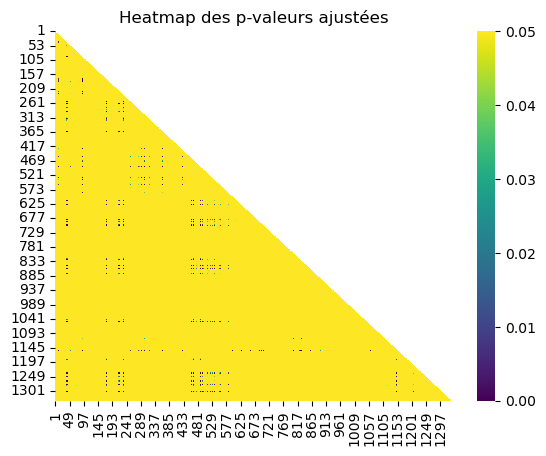

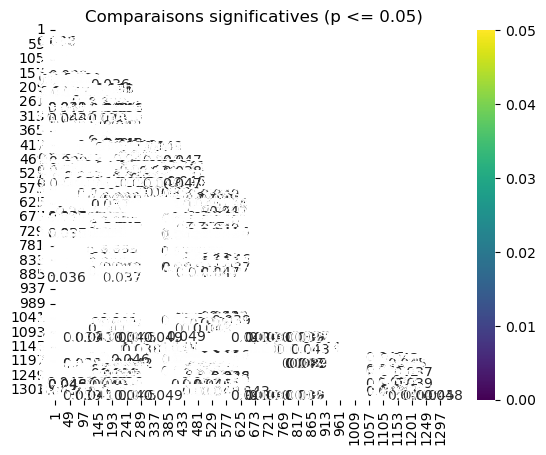

Paires avec différences significatives :
Groupe 1 vs Groupe 37 : p=0.021856505182309156
Groupe 1 vs Groupe 40 : p=0.036584666468533
Groupe 1 vs Groupe 41 : p=0.038254676025344755
Groupe 1 vs Groupe 171 : p=0.02999232356802068
Groupe 1 vs Groupe 172 : p=0.012207688827095805
Groupe 1 vs Groupe 174 : p=0.03134972404826002
Groupe 1 vs Groupe 178 : p=0.04005785017142848
Groupe 1 vs Groupe 181 : p=0.01974690133110636
Groupe 1 vs Groupe 225 : p=0.01968455159292219
Groupe 1 vs Groupe 229 : p=0.018229718129471467
Groupe 1 vs Groupe 453 : p=0.03553893905705487
Groupe 1 vs Groupe 465 : p=0.0122772315248533
Groupe 1 vs Groupe 488 : p=0.02727395923244145
Groupe 1 vs Groupe 489 : p=0.012207688827095805
Groupe 1 vs Groupe 490 : p=0.029413912864154547
Groupe 1 vs Groupe 497 : p=0.016340909155824115
Groupe 1 vs Groupe 506 : p=0.01744170898815787
Groupe 1 vs Groupe 508 : p=0.04203386746404154
Groupe 1 vs Groupe 528 : p=0.034681055929488024
Groupe 1 vs Groupe 554 : p=0.04106682734019173
Groupe 1 vs Group

In [44]:

# Conversion du DataFrame de p-valeurs en un tableau supérieur triangulaire pour faciliter la visualisation
mask = np.triu(np.ones_like(p_values, dtype=bool))

# Utilisation de  seaborn pour créer une carte de chaleur
sns.heatmap(p_values, mask=mask, cmap='viridis', vmax=0.05)
plt.title('Heatmap des p-valeurs ajustées')
plt.show()

# Pour filtrer et montrer seulement les comparaisons avec des différences significatives:
alpha = 0.05  # Niveau de signification
significant_comparisons = p_values.where(p_values <= alpha)
significant_mask = mask & (p_values <= alpha)

sns.heatmap(significant_comparisons, mask=significant_mask, cmap='viridis', vmax=0.05, annot=True)
plt.title('Comparaisons significatives (p <= 0.05)')
plt.show()

# Pour obtenir une liste des paires avec des différences significatives:
paires_significatives = np.where(p_values <= alpha)
# Créez une liste de tuples où chaque tuple contient les indices des groupes significativement différents
paires_indices = list(zip(paires_significatives[0], paires_significatives[1]))

print("Paires avec différences significatives :")
for (i, j) in paires_indices:
    if i < j:  # Assurez-vous de ne pas inclure les paires dupliquées ou la diagonale
        print(f"Groupe {i} vs Groupe {j} : p={p_values.iloc[i, j]}")


### SYNTHESE

In [ ]:
# Significativité Statistique : L'application du test de Dunn avec ajustement 'fdr_bh' a révélé des différences 
# significatives entre plusieurs groupes, indiquant une corrélation potentielle entre les variables étudiées.

# Pertinence des Données : La vérification préalable de l'homogénéité des variances et de la normalité des résidus 
#confirme la fiabilité des données, ce qui rend la modélisation plus pertinente pour extraire des insights significatifs.

# Potentiel de Découverte : Les résultats obtenus fournissent une base solide pour une exploration plus approfondie à 
# travers la modélisation, permettant de mieux comprendre les dynamiques sous-jacentes et d'optimiser les prises de décisions 
# basées sur les données.